Part 1: 2D convolution

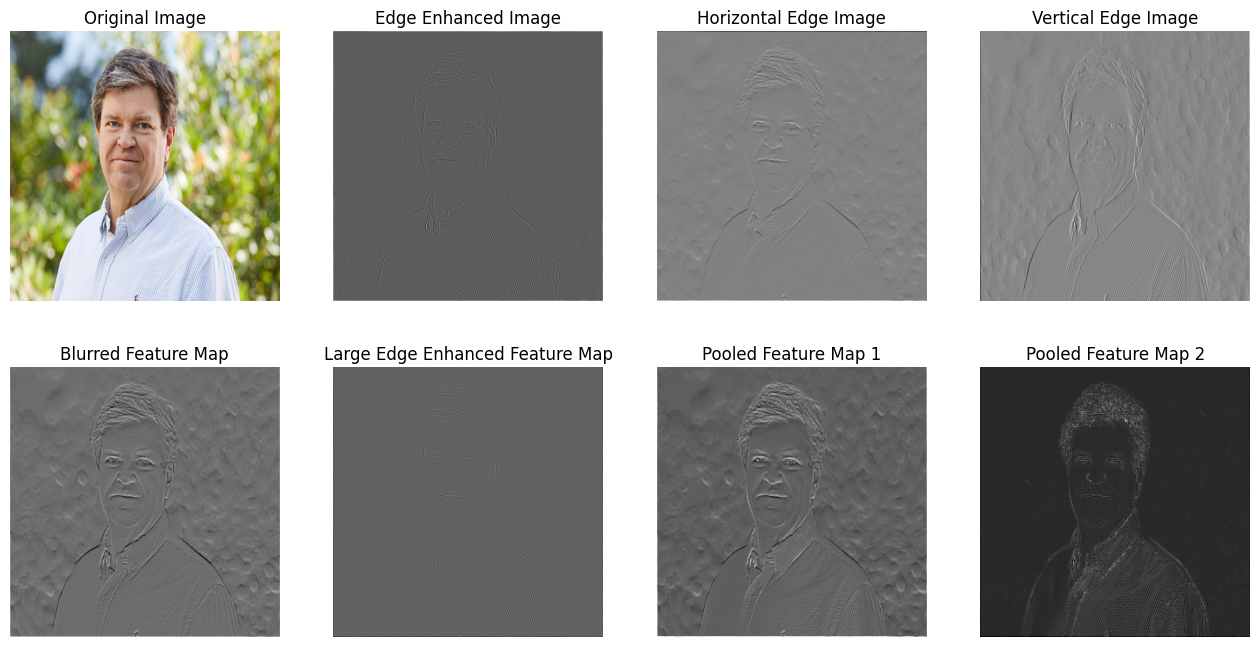

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def apply_convolution(image, kernel, stride=1, padding='valid'):
    """
    Apply a convolution operation on an image using a given kernel.
    
    Parameters:
    image (numpy.ndarray): Input image, a 3D array (height, width, channels).
    kernel (numpy.ndarray): Convolution kernel, a 2D array (kernel_height, kernel_width).
    stride (int, optional): Stride for the convolution. Default is 1.
    padding (str, optional): Padding type: 'valid' or 'same'. Default is 'valid'.
    
    Returns:
    numpy.ndarray: Output of the convolution, a 2D array (output_height, output_width).
    """
    image = np.array(image)
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape
    image_height, image_width, channels = image.shape
    
    # Handle padding
    if padding == 'same':
        pad_height = 1
        pad_width = 1
        padded_image = np.pad(image, (pad_width,), mode='constant', constant_values=0)
    elif padding == 'valid':
        pad_height = 0
        pad_width = 0
        padded_image = image
    else:
        raise ValueError('Invalid padding')

    # Calculate output dimensions
    output_height = (image_height + 2 * pad_height - kernel_height) // stride + 1
    output_width = (image_width + 2 * pad_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            for c in range(channels):
                start_i = i * stride
                start_j = j * stride
                end_i = start_i + kernel_height
                end_j = start_j + kernel_width
                output[i, j] += np.sum(padded_image[start_i:end_i, start_j:end_j, c] * kernel)
    
    return output

def max_pooling(image, size, stride):
    """
    Apply max pooling to an image.
    
    Parameters:
    image (numpy.ndarray): Input image, a 3D array (height, width, channels).
    size (int): Size of the pooling filter.
    stride (int): Stride for the pooling operation.
    
    Returns:
    numpy.ndarray: Output of the max pooling, a 3D array (output_height, output_width, channels).
    """
    image = np.array(image)
    image_height, image_width, channels = image.shape
    
    output_height = (image_height - size) // stride + 1
    output_width = (image_width - size) // stride + 1
    
    pooled_image = np.zeros((output_height, output_width, channels))
    
    for i in range(output_height):
        for j in range(output_width):
            for c in range(channels):
                start_i = i * stride
                start_j = j * stride
                end_i = start_i + size
                end_j = start_j + size
                pooled_image[i, j, c] = np.max(image[start_i:end_i, start_j:end_j, c])

    return pooled_image

# ----------------- Preprocessing -----------------
# Load image
image = cv2.imread('yann_lecun.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize to 600x600
image = cv2.resize(image, (600, 600))

# Show the original image
plt.figure(figsize=(16, 8))
plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# ----------------- Layer 1 -----------------
# Edge enhancement kernel
edge_enhancement_kernel = np.array([[-1, -1, -1],
                                    [-1, 8, -1],
                                    [-1, -1, -1]])
# Apply convolution
edge_enhanced_image = apply_convolution(image, edge_enhancement_kernel, padding='same')
plt.subplot(2, 4, 2)
plt.title('Edge Enhanced Image')
plt.imshow(edge_enhanced_image, cmap='gray')
plt.axis('off')

# Horizontal edge detection kernel
horizontal_edge_kernel = np.array([[1, 1, 1],
                                   [0, 0, 0],
                                   [-1, -1, -1]])
# Apply convolution
horizontal_edge_image = apply_convolution(image, horizontal_edge_kernel, padding='same')
plt.subplot(2, 4, 3)
plt.title('Horizontal Edge Image')
plt.imshow(horizontal_edge_image, cmap='gray')
plt.axis('off')

# Vertical edge detection kernel
vertical_edge_kernel = np.array([[1, 0, -1],
                                 [1, 0, -1],
                                 [1, 0, -1]])
# Apply convolution
vertical_edge_image = apply_convolution(image, vertical_edge_kernel, padding='same')
plt.subplot(2, 4, 4)
plt.title('Vertical Edge Image')
plt.imshow(vertical_edge_image, cmap='gray')
plt.axis('off')

# Stack images 3D to create a feature map
feature_map = np.stack((edge_enhanced_image, horizontal_edge_image, vertical_edge_image), axis=-1)

# ----------------- Layer 2 -----------------
# Gaussian blur kernel
gaussian_blur_kernel = np.array([[1, 4, 7, 4, 1],
                                 [4, 16, 26, 16, 4],
                                 [7, 26, 41, 26, 7],
                                 [4, 16, 26, 16, 4],
                                 [1, 4, 7, 4, 1]])

# Apply convolution to the feature map
blurred_feature_map = apply_convolution(feature_map, gaussian_blur_kernel, padding='same')
plt.subplot(2, 4, 5)
plt.title('Blurred Feature Map')
plt.imshow(blurred_feature_map, cmap='gray')
plt.axis('off')

# Large edge enhancement kernel
large_edge_enhancement_kernel = np.array([[0, 0, -1, 0, 0],
                                          [0, 0, -1, 0, 0],
                                          [-1, -1, 8, -1, -1],
                                          [0, 0, -1, 0, 0],
                                          [0, 0, -1, 0, 0]])

# Apply convolution to the feature map
large_edge_enhanced_feature_map = apply_convolution(feature_map, large_edge_enhancement_kernel, padding='same')
plt.subplot(2, 4, 6)
plt.title('Large Edge Enhanced Feature Map')
plt.imshow(large_edge_enhanced_feature_map, cmap='gray')
plt.axis('off')

# Stack images 3D to create a feature map
feature_map2 = np.stack((blurred_feature_map, large_edge_enhanced_feature_map), axis=-1)

# ----------------- Layer 3 -----------------
# Max pooling
pooled_feature_map = max_pooling(feature_map2, 2, 2)
# show each channel separately
plt.subplot(2, 4, 7)
plt.title('Pooled Feature Map 1')
plt.imshow(pooled_feature_map[:, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Pooled Feature Map 2')
plt.imshow(pooled_feature_map[:, :, 1], cmap='gray')
plt.axis('off')

plt.show()

Part 2: Image processing in frequency domain

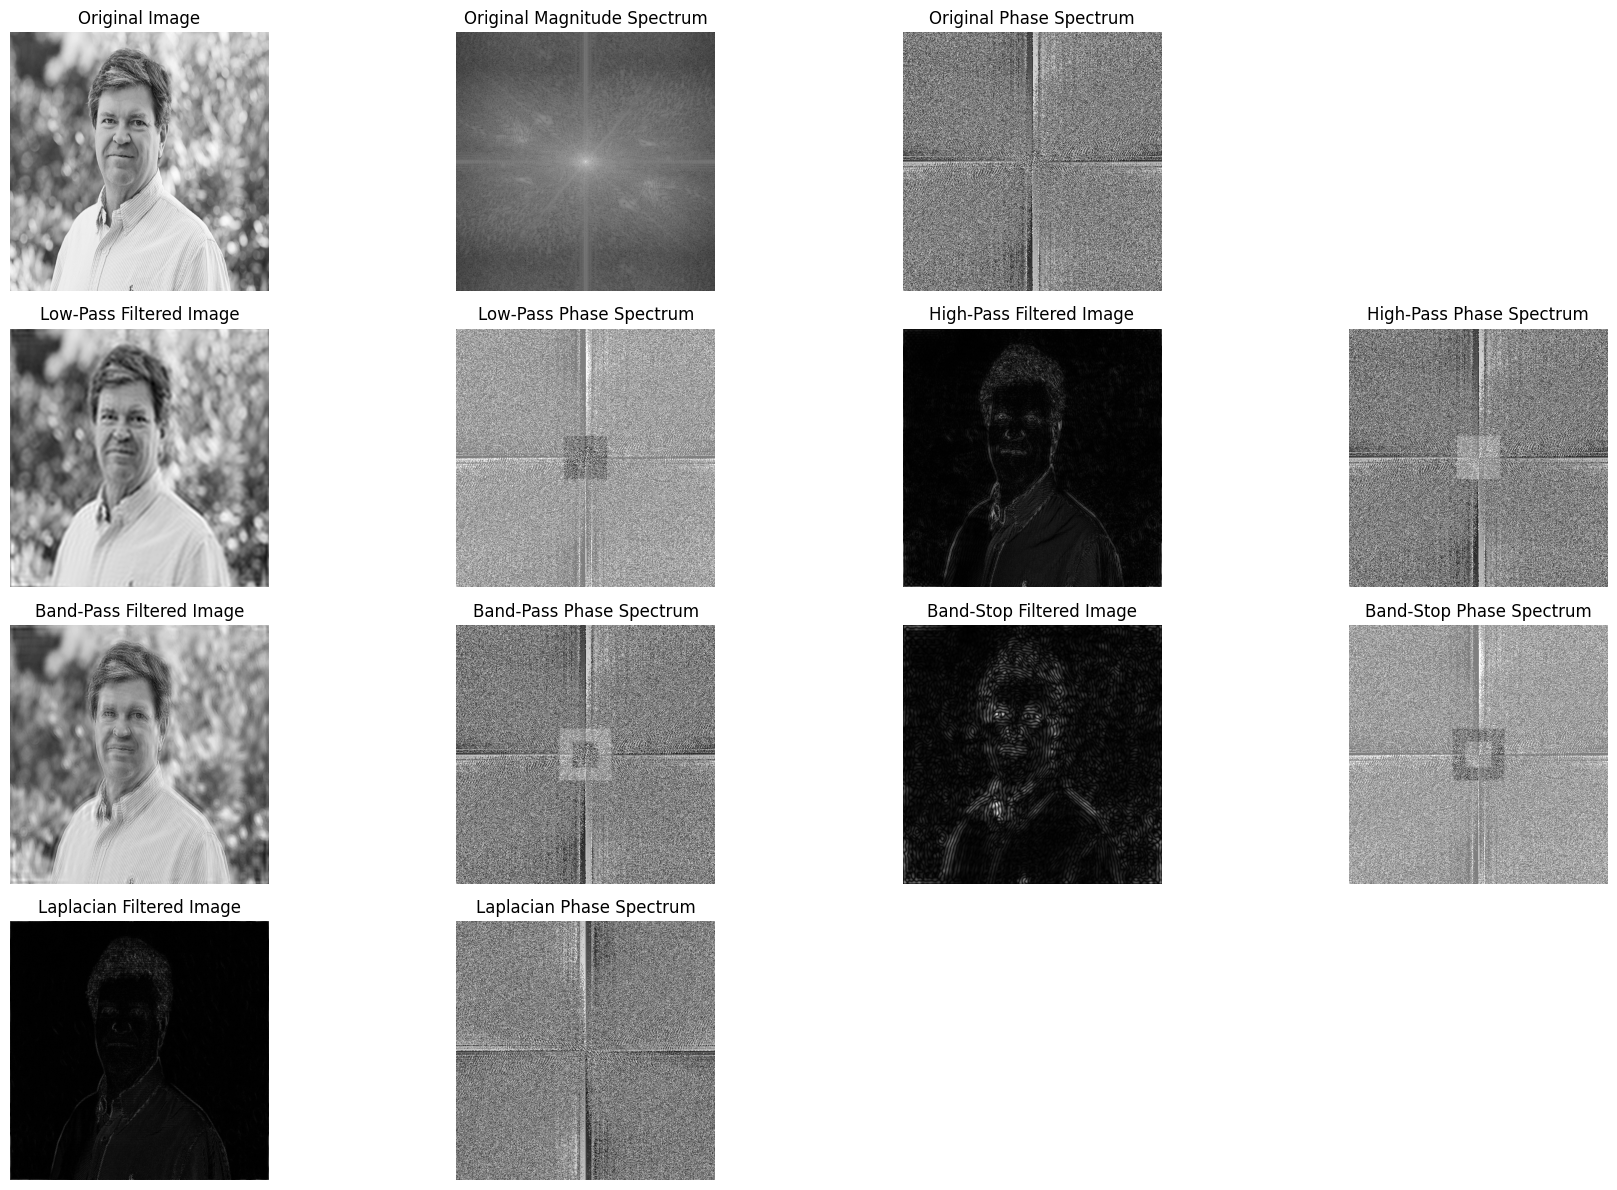

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image as grayscale
image = cv2.imread('yann_lecun.jpg', cv2.IMREAD_GRAYSCALE)

# Resize to 600x600
image = cv2.resize(image, (600, 600))

# Display the original image
plt.figure(figsize=(18, 12))
plt.subplot(4, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Compute the Fast Fourier Transform (FFT)
fft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
fft_shifted = np.fft.fftshift(fft)

# Compute magnitude and phase spectrum
magnitude_spectrum = np.abs(fft_shifted)
phase_spectrum = np.angle(fft_shifted)

# Display the magnitude and phase spectrum
plt.subplot(4, 4, 2)
plt.title('Original Magnitude Spectrum')
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 3)
plt.title('Original Phase Spectrum')
plt.imshow(phase_spectrum, cmap='gray')
plt.axis('off')

# Low/High-pass filter
def low_high_pass_filter(image, cutoff, low=True):
    fft = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2   # center of the frequency domain
    
    # Create a mask with ones in the low frequencies and zeros in the high frequencies (for low-pass)
    # and vice versa for high-pass
    mask = np.zeros((rows, cols), np.uint8)
    if low:
        mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
    else:
        mask = np.ones((rows, cols), np.uint8)
        mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0
    
    # Apply the mask to the FFT of the image
    filtered_fft_shifted = fft_shifted * mask
    
    # Shift the zero-frequency component back to the top-left
    fft = np.fft.ifftshift(filtered_fft_shifted)
    
    # Compute the inverse FFT
    filtered_image = np.fft.ifft2(fft)
    filtered_image = np.abs(filtered_image)
    
    return filtered_image, filtered_fft_shifted

# band-pass/band-stop filter
def band_pass_stop_filter(image, cutoff_low, cutoff_high, filter_type='pass'):
    fft = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2   # center of the frequency domain
    
    # Create a mask with ones for band-pass, will be inverted for band-stop
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - cutoff_high:crow + cutoff_high, ccol - cutoff_high:ccol + cutoff_high] = 0
    mask[crow - cutoff_low:crow + cutoff_low, ccol - cutoff_low:ccol + cutoff_low] = 1
    
    if filter_type == 'stop':
        mask = 1 - mask  # Invert mask for band-stop filter
    
    # Apply the mask to the FFT of the image
    filtered_fft_shifted = fft_shifted * mask
    
    # Shift the zero-frequency component back to the top-left
    filtered_fft = np.fft.ifftshift(filtered_fft_shifted)
    
    # Compute the inverse FFT
    filtered_image = np.fft.ifft2(filtered_fft)
    filtered_image = np.abs(filtered_image)
    
    return filtered_image, filtered_fft_shifted

# Laplacian filter
def laplacian_filter(image):
    fft = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2   # center of the frequency domain
    
    # Create a Laplacian filter in the frequency domain
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    U, V = np.meshgrid(u, v)
    laplacian_filter = -4 * np.pi**2 * (U**2 + V**2)
    
    # Apply the Laplacian filter to the FFT of the image
    laplacian_fft_shifted = fft_shifted * laplacian_filter
    
    # Shift the zero-frequency component back to the top-left
    fft = np.fft.ifftshift(laplacian_fft_shifted)
    
    # Compute the inverse FFT
    filtered_image = np.fft.ifft2(fft)
    filtered_image = np.abs(filtered_image)
    
    return filtered_image, laplacian_fft_shifted

# Apply filters
low_pass_image, low_pass_fft_shifted = low_high_pass_filter(image, cutoff=50, low=True)
high_pass_image, high_pass_fft_shifted = low_high_pass_filter(image, cutoff=50, low=False)
band_pass_image, band_pass_fft_shifted = band_pass_stop_filter(image, cutoff_low=30, cutoff_high=60, filter_type='pass')
band_stop_image, band_stop_fft_shifted = band_pass_stop_filter(image, cutoff_low=30, cutoff_high=60, filter_type='stop')
laplacian_image, laplacian_fft_shifted = laplacian_filter(image)

# Compute phase spectra
low_pass_phase_spectrum = np.angle(low_pass_fft_shifted)
high_pass_phase_spectrum = np.angle(high_pass_fft_shifted)
band_pass_phase_spectrum = np.angle(band_pass_fft_shifted)
band_stop_phase_spectrum = np.angle(band_stop_fft_shifted)
laplacian_phase_spectrum = np.angle(laplacian_fft_shifted)

# Display the filtered images and their phase spectra
plt.subplot(4, 4, 5)
plt.title('Low-Pass Filtered Image')
plt.imshow(low_pass_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 6)
plt.title('Low-Pass Phase Spectrum')
plt.imshow(low_pass_phase_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 7)
plt.title('High-Pass Filtered Image')
plt.imshow(high_pass_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 8)
plt.title('High-Pass Phase Spectrum')
plt.imshow(high_pass_phase_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 9)
plt.title('Band-Pass Filtered Image')
plt.imshow(band_pass_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 10)
plt.title('Band-Pass Phase Spectrum')
plt.imshow(band_pass_phase_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 11)
plt.title('Band-Stop Filtered Image')
plt.imshow(band_stop_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 12)
plt.title('Band-Stop Phase Spectrum')
plt.imshow(band_stop_phase_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 13)
plt.title('Laplacian Filtered Image')
plt.imshow(laplacian_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 14)
plt.title('Laplacian Phase Spectrum')
plt.imshow(laplacian_phase_spectrum, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()